In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read In Dataseet

In [2]:
df = pd.read_csv('suicide_rates.csv')

In [3]:
df.shape

(27820, 12)

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Examine Features

In [5]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [6]:
# Get list of countries
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [7]:
# Get subset of two countries

df_USA = df[df.country=='United States']
df_Albania = df[df.country=='Albania']

print('USA shape: ', df_USA.shape)
print('Albania shape: ', df_Albania.shape)

USA shape:  (372, 12)
Albania shape:  (264, 12)


In [8]:
# Examine 'HDI for year' feature

print(df_USA['HDI for year'].isnull().sum())
print(df_Albania['HDI for year'].isnull().sum())

252
216


In [9]:
# Drop 'HDI for year' feature since majority of instances are NaN for USA & Albania.
df = df.drop('HDI for year', axis=1)

We can assume this is the case for other countries as well. We could impute values for this feature, but since the majority is NaN, perhaps dropping the feature will not affect any model learning.

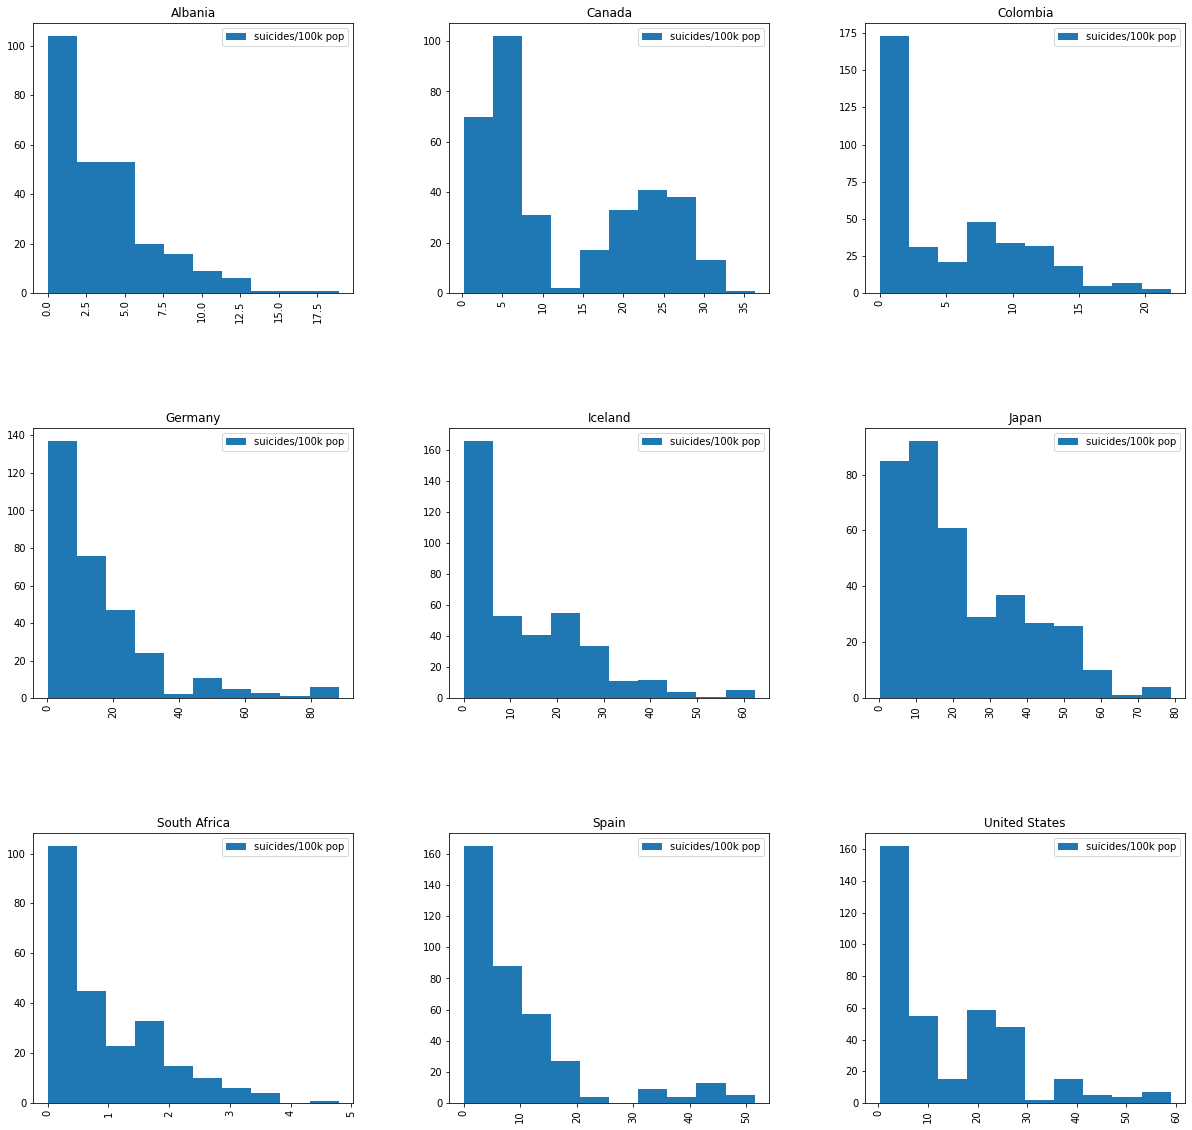

In [10]:
# histogram of 'suicides/100k pop' for various countries
country_list = ['Albania', 'United States', 'Spain', 'Japan', 'Iceland', 'Canada', 'Colombia', 'Germany', 'South Africa']

df[df.country.isin(country_list)].hist(column='suicides/100k pop',
                                       by='country',
                                       figsize=(20,20),
                                       legend=True
                                      );

From the historgrams above, we see that some countries have a disparity in the number of suicides/100k and their frequency. For example, South Africa's highest suicide count is around 4.5 suicides/100k, while Japan's is about 75. This means that more people in Japan are committing suicide than those in South Africa, assuming that these two occur at the same rate.

If we look at Iceland vs Japan however, we see that for 0-10 suicides in Iceland (about 210), occurs much more frequently than 0-10 suicides in Japan (90). However, larger numbers of suicide attempts in single years are more prevalent in Japan than in Iceland.

# Problem #1

In [11]:
# get male suicides/100k

def get_suicides(df, country, sex):
    df = df[df.country == country]
    
    suicides = []
    gdp = []

    years = df['year'].unique()
    
    # get total suicides/100k
    for i in years:
        total = df.loc[(df['sex'] == sex) & (df['year'] == i), 'suicides/100k pop'].sum()
        
        suicides.append(total)
    
    # get gdp per capita
    for j in years:
        total = df.loc[df['year'] == j, 'gdp_per_capita ($)'].unique()
        
        gdp.append(total)
    
    figure, ax = plt.subplots(1,2, figsize=(20,5))

    ax[0].plot(years, suicides)
    ax[0].set_title(f'{country} - {sex}:    suicides/100k by gender per year')
    
    ax[1].scatter(gdp, suicides)
    ax[1].set_title(f'{country}:    suicides/100k vs gdp')
    

    plt.show()

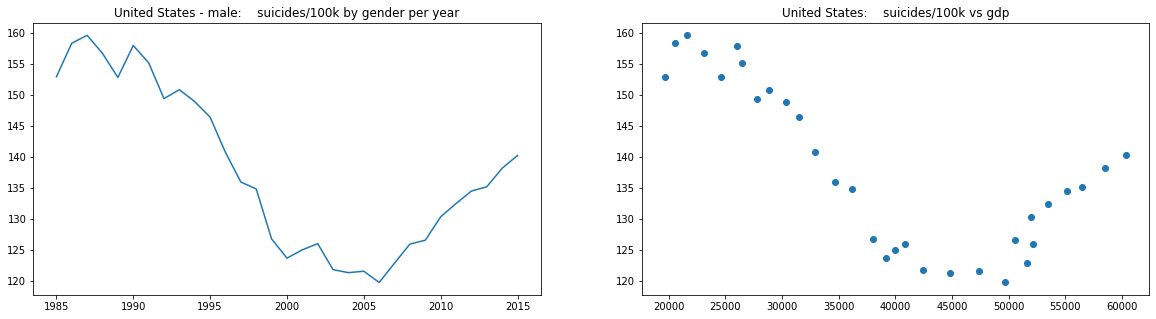

In [12]:
get_suicides(df, 'United States', 'male')

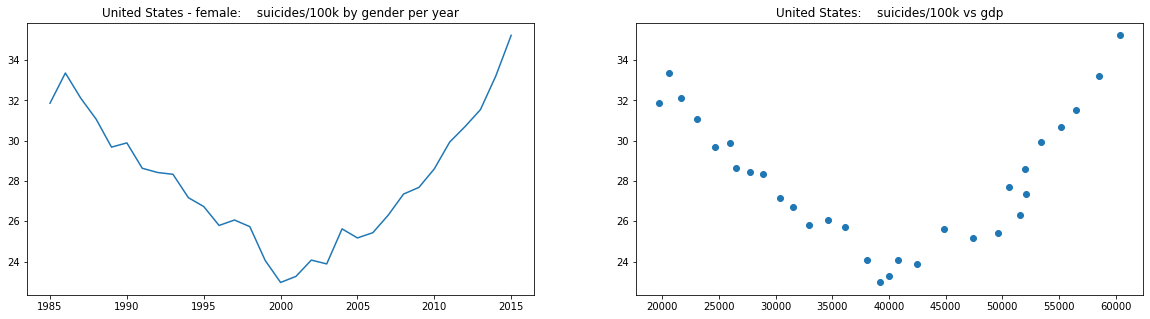

In [13]:
get_suicides(df, 'United States', 'female')

In [14]:
df_USA.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,0.106921,0.221208,-0.060746,0.994200,0.996908
suicides_no,0.106921,1.000000,0.549784,0.602962,0.123849,0.106406
population,0.221208,0.549784,1.000000,-0.170397,0.232421,0.220970
suicides/100k pop,-0.060746,0.602962,-0.170397,1.000000,-0.046703,-0.061157
HDI for year,0.994200,0.123849,0.232421,-0.046703,1.000000,0.990487
gdp_per_capita ($),0.996908,0.106406,0.220970,-0.061157,0.990487,1.000000


We'll look at the United States subset to get a general idea of the dataset nature pertaining to other countries as well. At first look, we plot the **suicides/100k pop** over time for both males and females of all age groups. We observe that for males, the downward trend of suicides continue till about 2006, whereas it's 2000 for females. After these respective points, the suicide rates increase steadily.

Some may assume that there is a inverse correlation between gdp and suicide rate, but shown the in plots above, that is not the case. GDP for a big economy like the US's is usually monotonically increasing. Thus, the plot of suicides vs GDP should be similar to that of suicides vs year (year is monotonically increasing).

Given the available dataset, I think the most important information to learn is **suicides/100k population**. I choose this feature because the exact number of suicides doesn't give us a sense of the proportion of the suicides to population. I think this information can be learned if we have the appropriate features that show a strong correlation with the information.

Also, if we could predict the suicides/100k pop for a given cohert, it could give the government and relevant organizations a better idea of where to focus resources for suicide prevention. For example, perhaps males of a certain age group was predicted to have a higher than average suicide rate. Thus, organizations could reach out to this demogrpahic earlier before any member loses their life.

# Problem #2

In predicting an exact value for *suicides/100k pop*, it would be a regression problem. We would need to learn the weights of the selected features used for input of the regression model. Any categorical or nominal features would have to be numerically encoded for the model to understand. Specifically for regression, we could use the perceptron model covered in previous weeks.

A classification problem can also be devised. If we set a threshold say anything above 3.75 suicides/100k pop is high suicide risk, then we first can add labels to each instance depending on its suicides/100k pop value (high/low risk). Then, using our selected features, we can perform various classificaiton models with information from a given cohort to determine if they are high/low risk. Since this dataset has a lot of categorical feature values, perhaps a decision tree classifier would work more ideal here. Drawing a decision boundary in with discrete values for these categorical features could be challenging.

Regarding unsupervised, we could perform dimensionality reduction to 3D space by linearly grouping various features. Which features to be grouped and reduced to 3D is up to the user. After plotting, we could observe if there are 2 clusters or not (high/low risk).

# Problem #3

The dependent variable is suicides/100k pop. We are trying to predict this (if doing regression), or classifying instances as high/low risk based on a threshold we have set for the suicides/100k pop feature.

# Problem #4

In [15]:
import seaborn as sns

In [16]:
def encode_onehot(_df, f):
    _df2 = pd.get_dummies(_df[f], prefix='', prefix_sep='').max(level=0, axis=1).add_prefix(f+' - ')
    df3 = pd.concat([_df, _df2], axis=1)
    df3 = df3.drop([f], axis=1)
    return df3

In [17]:
# onehot-encode categorical/nominal features
df_o = encode_onehot(df_USA, 'sex')
df_USA['sex'] = df_o['sex - male']

In [18]:
# numerically encode 'age' feature
def encode_age(df):
    ages = list(df.age.unique())
    
    for i in range(len(ages)):
        df.replace(ages[i], i, inplace=True)

In [19]:
# numerically encode 'generation' feature
def encode_generation(df):
    gens = list(df.generation.unique())
    
    for i in range(len(gens)):
        df.replace(gens[i], i, inplace=True)

In [20]:
encode_age(df_USA)

In [21]:
encode_generation(df_USA)

In [22]:
df_USA.fillna(df_USA['HDI for year'].mean())

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,1,0,2177,4064000,53.57,United States1985,0.8410,"4,346,734,000,000",19693,0
26849,United States,1985,1,1,5302,17971000,29.50,United States1985,0.8410,"4,346,734,000,000",19693,0
26850,United States,1985,1,2,5134,20986000,24.46,United States1985,0.8410,"4,346,734,000,000",19693,1
26851,United States,1985,1,3,6053,26589000,22.77,United States1985,0.8410,"4,346,734,000,000",19693,2
26852,United States,1985,1,4,4267,19962000,21.38,United States1985,0.8410,"4,346,734,000,000",19693,3
...,...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,0,2,1444,21555712,6.70,United States2015,0.8916,"18,120,714,000,000",60387,4
27216,United States,2015,0,4,1132,21633813,5.23,United States2015,0.8916,"18,120,714,000,000",60387,4
27217,United States,2015,0,0,540,11778666,4.58,United States2015,0.8916,"18,120,714,000,000",60387,2
27218,United States,2015,1,5,255,21273987,1.20,United States2015,0.8916,"18,120,714,000,000",60387,5


In [23]:
df_USA.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,1,0,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,0
26849,United States,1985,1,1,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,0
26850,United States,1985,1,2,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,1
26851,United States,1985,1,3,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,2
26852,United States,1985,1,4,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,3


In [24]:
corr_matrix = df_USA.corr()

<AxesSubplot:>

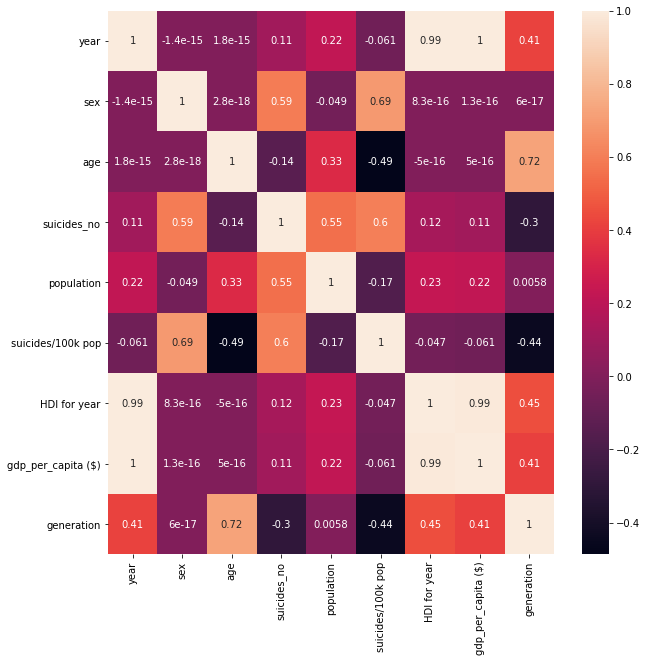

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)

Looking at the correlation map, we can rank the features from strongest to weakest relevant to the dependent variable suicides/100k pop.

1. sex
2. suicides_no
3. HDI for year
4. gdp_per_capita
5. year
6. population
7. generation
8. age

Note that here we included the year and HDI feature just for practical purposes. As stated earlier, HDI is mostly NaN, so perhaps it is best to ommit this feature as imputing NaN values here based on the few sample values available may throw off the model training. Also, year is a derived feature and does not hold information on what specific features contribute to the dependent variable. Thus, in further preprocessing, year should be omitted as well.

# Problem #5

As stated, we're working with United States subset to better manage the data. Same process applied here would be applied to subsets of other countries.

Some preprocessing has already been done in the previous steps such as encoding the nominal features. Please reference the previous problem for some precoessing related to this problem.

In [26]:
df_USA.head(1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,1,0,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,0


In [27]:
# drop unnecessary features
df_USA.drop(['country', 'year', 'country-year'], axis=1, inplace=True)

In [28]:
df_USA.dtypes

sex                     uint8
age                     int64
suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation              int64
dtype: object

In [29]:
# convert gdp_for_year to integer
df_USA[' gdp_for_year ($) '] = df_USA[' gdp_for_year ($) '].str.replace(',', '').astype(int)

In [30]:
df_USA.head()

,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,1,0,2177,4064000,53.57,0.841,4346734000000,19693,0
26849,1,1,5302,17971000,29.50,0.841,4346734000000,19693,0
26850,1,2,5134,20986000,24.46,0.841,4346734000000,19693,1
26851,1,3,6053,26589000,22.77,0.841,4346734000000,19693,2
26852,1,4,4267,19962000,21.38,0.841,4346734000000,19693,3


# Problem #6

A classification model we can use is a decision tree. We can classify a certain cohort as high/low risk for suicide based on a threshold of the dependent variable suicides/100k pop. By varying this threshold, we can get a cohort to either fall into either of the 2 labels.